### Prepared by Abhishek Kumar
### https://www.linkedin.com/in/abhishekkumar-0311/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [3]:
# Setup : DataFrame creation

salary = [['1','Abhishek Kumar','AIML', 'Machine Learning Engineer','M', 'Y', '04051990', 1121000],
          ['2','Arjun Kumar','DM', 'Tech Lead','M', 'Y', '09031992', 109000],
          ['3','Vivek Raj','DM', 'Devops Engineer','M', 'N', np.NaN , 827000],
          ['4','Mika Singh','DM', 'Data Analyst','F', 'Y', '15101991',  np.NaN],
          ['5','Anusha Yenduri','AIML', 'Data Scientist','F', 'Y', '01011989',  921000],
          ['6','Ritesh Srivastava','AIML', 'Data Engineer','M', 'Y', np.NaN, 785000]]

columns_name=['Emp_Id','Emp_Name','Department','Role','Gender', 'WFH Status', 'DOB', 'Salary']

emp_df = pd.DataFrame(salary,columns=columns_name)
emp_df

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


In [4]:
import numpy as np
import pandas as pd
sample = {
'col_a':['Houston,TX', 'Dallas,TX', 'Chicago,IL', 'Phoenix,AZ',      'San Diego,CA'],
'col_b':['62K-70K', '62K-70K', '69K-76K', '62K-72K', '71K-78K' ],
'col_c':['A','B','A','a','c'],
'col_d':['  1x', ' 1y', '2x  ', '1x', '1y  ']
}
df_sample = pd.DataFrame(sample)
df_sample

,col_a,col_b,col_c,col_d
0,"Houston,TX",62K-70K,A,1x
1,"Dallas,TX",62K-70K,B,1y
2,"Chicago,IL",69K-76K,A,2x
3,"Phoenix,AZ",62K-72K,a,1x
4,"San Diego,CA",71K-78K,c,1y


# Functions discussed in this Notebook - Part 1

|Function	    							|Description																		|Part|
|:-|:-|:-|
|apply()									|Apply a function along an axis of the DataFrame.									|1|
|applymap()									|Apply a function to a Dataframe elementwise. 										|1|
|map()										|map() is used to substitute each value in a Series with another value.				|1|
|transform()								|Call func on self producing a DataFrame with transformed values.					|1|

|Function	    							|Description																		|Part|
|:-|:-|:-|
|pipe()										|Apply func(self, *args, **kwargs).													|2|
|df.assign()								|Assign new columns to a DataFrame.													|2|
|df.update()								|Modify in place using non-NA values from another DataFrame.						|2|
|df.take									|Return the elements in the given positional indices along an axis.					|2|
|df.truncate								|Truncate a Series or DataFrame before and after some index value.					|2|

|Function	    							|Description																		|Part|
|:-|:-|:-|
|df.items									|Iterates over the DataFrame columns, returning a tuple with the column name and the content as a Series.|3|
|df.iteritems								|Iterates over the DataFrame columns, returning a tuple with the column name and the content as a Series.|3|
|df.iterrows								|Iterate over DataFrame rows as (index, Series) pairs.								|3|
|df.itertuples								|Iterate over DataFrame rows as namedtuples.										|3|


# Apply() , Applymap(), Map()

- **https://medium.com/@evelynli_30748/map-apply-applymap-with-the-lambda-function-5e83028be759**
- **https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff**
- **https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas**

- **apply() is used to apply a function along an axis of the DataFrame or on values of Series.**
- **applymap() is used to apply a function to a DataFrame elementwise.**
- **map() is used to substitute each value in a Series with another value.**

In [5]:
# Setup Data
df = df_sample.copy()
df

,col_a,col_b,col_c,col_d
0,"Houston,TX",62K-70K,A,1x
1,"Dallas,TX",62K-70K,B,1y
2,"Chicago,IL",69K-76K,A,2x
3,"Phoenix,AZ",62K-72K,a,1x
4,"San Diego,CA",71K-78K,c,1y


### Problem 1 : Replacing 2nd word of col_a with 1st word of col_a

In [6]:
# Replacing 2nd word of col_a with 1st word of col_a
dfp = df.copy()
#dfp

dfp['DupA'] = dfp['col_a']
dfp

x = dfp.col_a.str.split(',').str[0]

def func(row):
    return row['DupA'].replace(row['DupA'].split(',')[1], row['DupA'].split(',')[0])

# The Pandas apply() is used to apply a function along an axis of the DataFrame or on values of Series.
dfp['DupA'] = dfp.apply(func, axis = 1)

dfp

# d2= dfp.apply(func, axis = 1)

# d2

,col_a,col_b,col_c,col_d,DupA
0,"Houston,TX",62K-70K,A,1x,"Houston,TX"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,TX"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,IL"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,AZ"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,CA"


,col_a,col_b,col_c,col_d,DupA
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego"


- Let’s take a look df.apply(func, axis=1)
    - The first parameter func is a function.
    - The second parameter axis is to specify which axis the function is applied to. 0 for applying the function to each column and 1 for applying the function to each row.
        - Let me explain this process in a more intuitive way. The second parameter axis = 1 tells Pandas to use the row. So, the func is applied to each row and returns a new Series with the output of each row as value.

### Problem 2 : Creating a new column containing sepal length in mm

- Using Map(), Column/Series Operation, Apply() with series

In [7]:
# we are going to use dataset Iris 
from sklearn.datasets import load_iris
data = load_iris()
features = pd.DataFrame(data = data['data'], columns= data ['feature_names'])
features.head() #glance at the data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#example : let's say, we would like to change the measurement of the sepal length from cm to mm, 
# this is what we can do with the map function and put a function call cm_to_mm inside. 
def cm_to_mm(cm):
    mm = cm * 10
    return mm

features['sl_mm1'] = features['sepal length (cm)'].map(cm_to_mm).head() #this way, we have used this function on this pandas series 


In [9]:
features['sl_mm2'] = features['sepal length (cm)'] * 10
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sl_mm1,sl_mm2
0,5.1,3.5,1.4,0.2,51.0,51.0
1,4.9,3.0,1.4,0.2,49.0,49.0
2,4.7,3.2,1.3,0.2,47.0,47.0
3,4.6,3.1,1.5,0.2,46.0,46.0
4,5.0,3.6,1.4,0.2,50.0,50.0


In [10]:
features['sl_mm3'] = features['sepal length (cm)'].apply(lambda x : x*10)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sl_mm1,sl_mm2,sl_mm3
0,5.1,3.5,1.4,0.2,51.0,51.0,51.0
1,4.9,3.0,1.4,0.2,49.0,49.0,49.0
2,4.7,3.2,1.3,0.2,47.0,47.0,47.0
3,4.6,3.1,1.5,0.2,46.0,46.0,46.0
4,5.0,3.6,1.4,0.2,50.0,50.0,50.0


### Using apply() on 2 columns of  a dataframe, with axis = 0, by default

In [11]:
features[['sl_mm4','sl_mm5']] = features[['sepal length (cm)','sepal width (cm)']].apply(lambda x : x*10)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sl_mm1,sl_mm2,sl_mm3,sl_mm4,sl_mm5
0,5.1,3.5,1.4,0.2,51.0,51.0,51.0,51.0,35.0
1,4.9,3.0,1.4,0.2,49.0,49.0,49.0,49.0,30.0
2,4.7,3.2,1.3,0.2,47.0,47.0,47.0,47.0,32.0
3,4.6,3.1,1.5,0.2,46.0,46.0,46.0,46.0,31.0
4,5.0,3.6,1.4,0.2,50.0,50.0,50.0,50.0,36.0


### Using apply() on 2 columns of  a dataframe, with axis = 1 i.e, taking each row for operation


- with Lambda function

In [12]:
features['sl_mm45'] = features[['sl_mm4','sl_mm5']].apply(lambda x : x['sl_mm4']+x['sl_mm5'], axis=1)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sl_mm1,sl_mm2,sl_mm3,sl_mm4,sl_mm5,sl_mm45
0,5.1,3.5,1.4,0.2,51.0,51.0,51.0,51.0,35.0,86.0
1,4.9,3.0,1.4,0.2,49.0,49.0,49.0,49.0,30.0,79.0
2,4.7,3.2,1.3,0.2,47.0,47.0,47.0,47.0,32.0,79.0
3,4.6,3.1,1.5,0.2,46.0,46.0,46.0,46.0,31.0,77.0
4,5.0,3.6,1.4,0.2,50.0,50.0,50.0,50.0,36.0,86.0


- with User defined function

In [13]:
def sum(x):
    return x['sl_mm4']+x['sl_mm5']

features['sl_mm45'] = features[['sl_mm4','sl_mm5']].apply(sum, axis=1)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sl_mm1,sl_mm2,sl_mm3,sl_mm4,sl_mm5,sl_mm45
0,5.1,3.5,1.4,0.2,51.0,51.0,51.0,51.0,35.0,86.0
1,4.9,3.0,1.4,0.2,49.0,49.0,49.0,49.0,30.0,79.0
2,4.7,3.2,1.3,0.2,47.0,47.0,47.0,47.0,32.0,79.0
3,4.6,3.1,1.5,0.2,46.0,46.0,46.0,46.0,31.0,77.0
4,5.0,3.6,1.4,0.2,50.0,50.0,50.0,50.0,36.0,86.0


### Extra parameters in Map() does not work

In [14]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
    
# features['sl_mm45'].map(label, x = 32) # Does not work

In [15]:
def label(element):
    if element > 32:
        return 'High'
    else:
        return 'Low'

features['sl_mm45'].map(label)

0      High
1      High
2      High
3      High
4      High
       ... 
145    High
146    High
147    High
148    High
149    High
Name: sl_mm45, Length: 150, dtype: object

## Applymap()

### The applymap() method works on the entire pandas data frame where the input function is applied to every element individually. In other words, applymap() is appy() + map()!

### Comparing map, applymap and apply: Context Matters

- First major difference: **DEFINITION**

    - ```map``` is defined on Series ONLY
    - ```applymap``` is defined on DataFrames ONLY
    - ```apply``` is defined on BOTH

- Second major difference: **INPUT ARGUMENT**

    - ```map``` accepts ```dicts```, ```Series```, or callable
    - ```applymap``` and ```apply``` accept callables only

- Third major difference: **BEHAVIOR**

    - ```map``` is elementwise for Series
    - ```applymap``` is elementwise for DataFrames
    - ```apply``` also works elementwise but is suited to more complex operations and aggregation. The behaviour and return value depends on the function.

- Fourth major difference (the most important one): **USE CASE**

    - ```map``` is meant for mapping values from one domain to another, so is optimised for performance (e.g., ```df['A'].map({1:'a', 2:'b', 3:'c'}))```
    - ```applymap``` is good for elementwise transformations across multiple rows/columns (e.g., ```df[['A', 'B', 'C']].applymap(str.strip))```
    - ```apply``` is for applying any function that cannot be vectorised (e.g., ```df['sentences'].apply(nltk.sent_tokenize))```
    
### Summarising

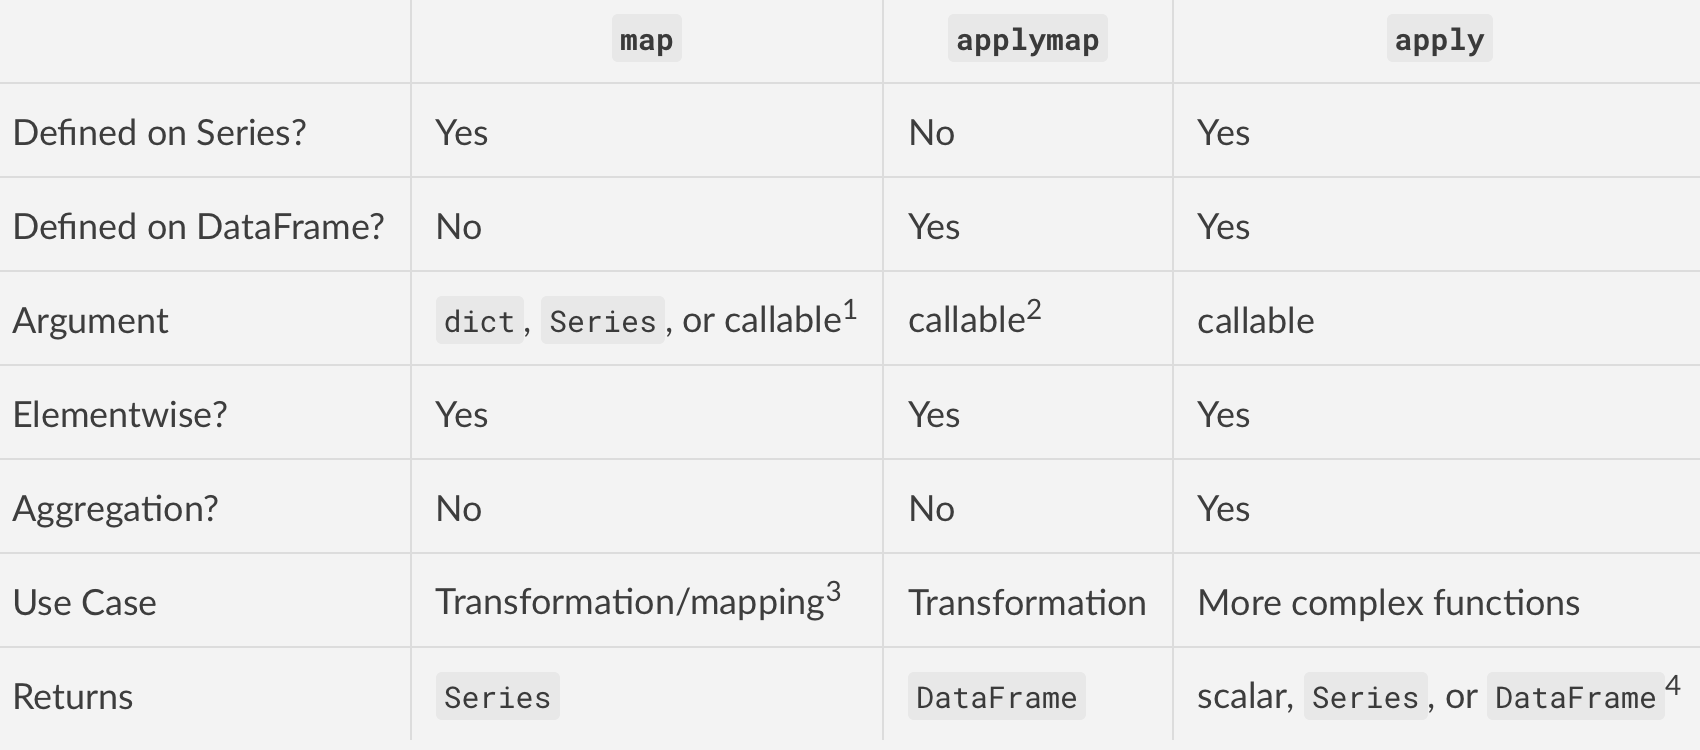

Footnotes

1. ```map``` when passed a dictionary/Series will map elements based on the keys in that dictionary/Series. Missing values will be recorded as NaN in the output.
2. ```applymap``` in more recent versions has been optimised for some operations. You will find ```applymap``` slightly faster than ```apply``` in some cases. My suggestion is to test them both and use whatever works better.

3. ```map``` is optimised for elementwise mappings and transformation. Operations that involve dictionaries or Series will enable pandas to use faster code paths for better performance.

4. ```Series.apply``` returns a scalar for aggregating operations, Series otherwise. Similarly for ```DataFrame.apply```. Note that ```apply``` also has fastpaths when called with certain NumPy functions such as ```mean```, ```sum```, etc.

- **https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas**

# Transform()

- **https://towardsdatascience.com/when-to-use-pandas-transform-function-df8861aa0dcf**
- **https://pbpython.com/pandas_transform.html**
- **https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/**

1. Transforming values
2. Combining groupby() results
3. Filtering data
4. Handling missing value at the group level

## 1. Transform values

### A function

In [16]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df

,A,B
0,1,10
1,2,20
2,3,30


In [17]:
def plus_10(x):
    return x+10

df.transform(plus_10)

,A,B
0,11,20
1,12,30
2,13,40


In [18]:
df.transform(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


### A string function

In [19]:
df.transform('sqrt')

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


### A list of functions

In [20]:
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

### A dict of axis labels -> functions

In [21]:
df.transform({
    'A': np.sqrt,
    'B': np.exp,
})

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


## 2. Combining groupby results

In [22]:
# a dataset about a restaurant chain
df = pd.DataFrame({
  'restaurant_id': [101,102,103,104,105,106,107],
  'address': ['A','B','C','D', 'E', 'F', 'G'],
  'city': ['London','London','London','Oxford','Oxford', 'Durham', 'Durham'],
  'sales': [10,500,48,12,21,22,14]
})
df

,restaurant_id,address,city,sales
0,101,A,London,10
1,102,B,London,500
2,103,C,London,48
3,104,D,Oxford,12
4,105,E,Oxford,21
5,106,F,Durham,22
6,107,G,Durham,14


### Soluton one: `groupby()`, `apply()`, and `merge()`

In [23]:
# Step 1: groupby and sum
def sum(col):
    return col.sum()

# Call the user defined sum function - by default axis=0, which means it applies on a column ( a series)
city_sales = df.groupby('city')['sales'].apply(sum).rename('city_total_sales').reset_index()
city_sales

,city,city_total_sales
0,Durham,36
1,London,558
2,Oxford,33


In [24]:
# Step 1: The Pandas sum equivalent 
city_sales = df.groupby('city')['sales'].sum().rename('city_total_sales').reset_index()
city_sales

,city,city_total_sales
0,Durham,36
1,London,558
2,Oxford,33


In [25]:
# Step 2: merge
df_new = pd.merge(df, city_sales, how='left')
df_new

,restaurant_id,address,city,sales,city_total_sales
0,101,A,London,10,558
1,102,B,London,500,558
2,103,C,London,48,558
3,104,D,Oxford,12,33
4,105,E,Oxford,21,33
5,106,F,Durham,22,36
6,107,G,Durham,14,36


In [26]:
# Step 3
df_new['pct'] = df_new['sales'] / df_new['city_total_sales']
df_new['pct'] = df_new['pct'].apply(lambda x: format(x, '.2%'))

df_new

,restaurant_id,address,city,sales,city_total_sales,pct
0,101,A,London,10,558,1.79%
1,102,B,London,500,558,89.61%
2,103,C,London,48,558,8.60%
3,104,D,Oxford,12,33,36.36%
4,105,E,Oxford,21,33,63.64%
5,106,F,Durham,22,36,61.11%
6,107,G,Durham,14,36,38.89%


### Solution 2: `groupby()` and `transform()`

In [27]:
# Step 1
df['city_total_sales'] = df.groupby('city')['sales'].transform('sum')
df

,restaurant_id,address,city,sales,city_total_sales
0,101,A,London,10,558
1,102,B,London,500,558
2,103,C,London,48,558
3,104,D,Oxford,12,33
4,105,E,Oxford,21,33
5,106,F,Durham,22,36
6,107,G,Durham,14,36


In [28]:
# Step 2
df['pct'] = df['sales'] / df['city_total_sales']
df['pct'] = df['pct'].apply(lambda x: format(x, '.2%'))
df

,restaurant_id,address,city,sales,city_total_sales,pct
0,101,A,London,10,558,1.79%
1,102,B,London,500,558,89.61%
2,103,C,London,48,558,8.60%
3,104,D,Oxford,12,33,36.36%
4,105,E,Oxford,21,33,63.64%
5,106,F,Durham,22,36,61.11%
6,107,G,Durham,14,36,38.89%


## 3. Filtering data

In [29]:
df[df.groupby('city')['sales'].transform('sum') > 40]

,restaurant_id,address,city,sales,city_total_sales,pct
0,101,A,London,10,558,1.79%
1,102,B,London,500,558,89.61%
2,103,C,London,48,558,8.60%


## 4. Handling missing values at the group level

In [30]:
df = pd.DataFrame({
    'name': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'value': [1, np.nan, np.nan, 2,8,2,np.nan, 3]
})
df

,name,value
0,A,1.0
1,A,NaN
2,B,NaN
3,B,2.0
4,B,8.0
5,C,2.0
6,C,NaN
7,C,3.0


In [31]:
df.groupby('name')['value'].mean()

name
A    1.0
B    5.0
C    2.5
Name: value, dtype: float64

In [32]:
df['value'] = df.groupby('name').transform(lambda x: x.fillna(x.mean()))
df

,name,value
0,A,1.0
1,A,1.0
2,B,5.0
3,B,2.0
4,B,8.0
5,C,2.0
6,C,2.5
7,C,3.0


## Difference between apply() and transform() in Pandas

- 3 main differences

    1. `transform()` can take a function, a string function, a list of functions, and a dict. However, `apply()` is only allowed a function.
    2. `transform()` cannot produce aggregated results
    3. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.
    
- **https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705**
- **https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/**

## 1 Manipulating values

In [33]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })

In [34]:
def plus_10(x):
    return x+10

#### For the entire DataFrame

In [35]:
df.apply(plus_10)

,A,B
0,11,20
1,12,30
2,13,40


In [36]:
df.transform(plus_10)

,A,B
0,11,20
1,12,30
2,13,40


In [37]:
## lambda equivalent
df.apply(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


In [38]:
## lambda equivalent
df.transform(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


#### For a single column

In [39]:
df['B_ap'] = df['B'].apply(plus_10)
df

,A,B,B_ap
0,1,10,20
1,2,20,30
2,3,30,40


In [40]:
df['B_tr'] = df['B'].transform(plus_10)
df

,A,B,B_ap,B_tr
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


### Difference

3 main differences
1. `transform()` can take a function, a string function, a list of functions, and a dict. However, `apply()` is only allowed a function.
2. `transform()` cannot produce aggregated results
3. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.

In [41]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })

**1. `transform()` can takes a function, a string function, a list of functions, and a dict. However, `apply()` is only allowed a function.**

In [42]:
# A string function
df.transform('sqrt')

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [43]:
# A list of functions
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [44]:
# A dict of axis labels -> function
df.transform({
    'A': np.sqrt,
    'B': np.exp,
})

df[['A1','B1']] = df.transform({
    'A': np.sqrt,
    'B': np.exp,
})

df

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


,A,B,A1,B1
0,1,10,1.000000,2.202647e+04
1,2,20,1.414214,4.851652e+08
2,3,30,1.732051,1.068647e+13


**2. `transform()` cannot produce aggregated results**

In [45]:
# This is working for apply()
df.apply(lambda x:x.sum())

A     6.000000e+00
B     6.000000e+01
A1    4.146264e+00
B1    1.068696e+13
dtype: float64

- **This feature is not possible in the Transform function. This just manipulates a single row or column based on axis value and doesn’t manipulate a whole dataframe. So, we can use either Apply or the Transform function depending on the requirement.**

In [46]:
## but getting error with transform()
# Uncomment to check

# df.transform(lambda x:x.sum())

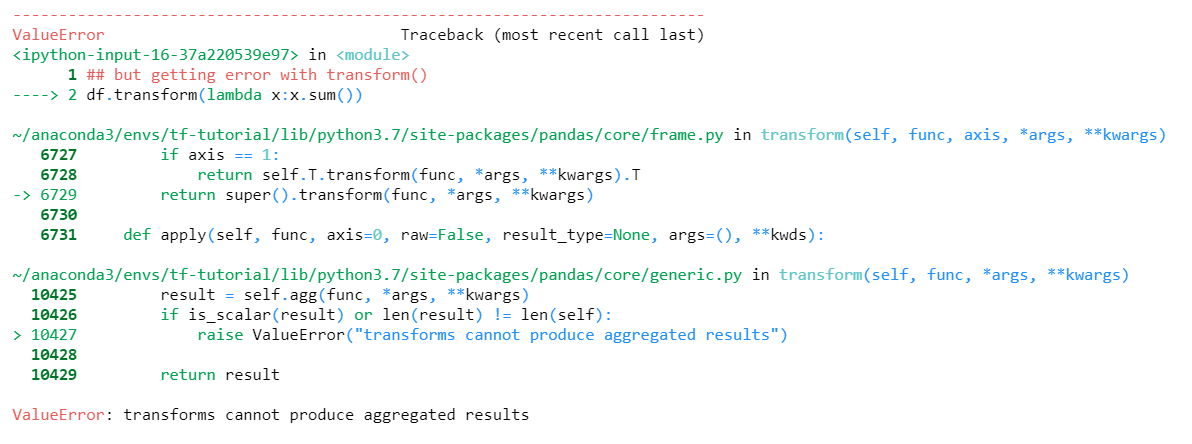

**3. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.**

In [47]:
def subtract_two(x):
    return x['B'] - x['A']

In [48]:
# Working for apply with axis=1
df['diff1'] = df.apply(subtract_two, axis=1)
df

,A,B,A1,B1,diff1
0,1,10,1.000000,2.202647e+04,9.0
1,2,20,1.414214,4.851652e+08,18.0
2,3,30,1.732051,1.068647e+13,27.0


- **This feature is not possible in the Transform function. This just manipulates a single row or column based on axis value and doesn’t manipulate a whole dataframe. So, we can use either Apply or the Transform function depending on the requirement.**

In [49]:
# Getting error when trying the same with transform
# Uncomment to check
# df['diff2'] =  df.transform(subtract_two, axis=1)
# df

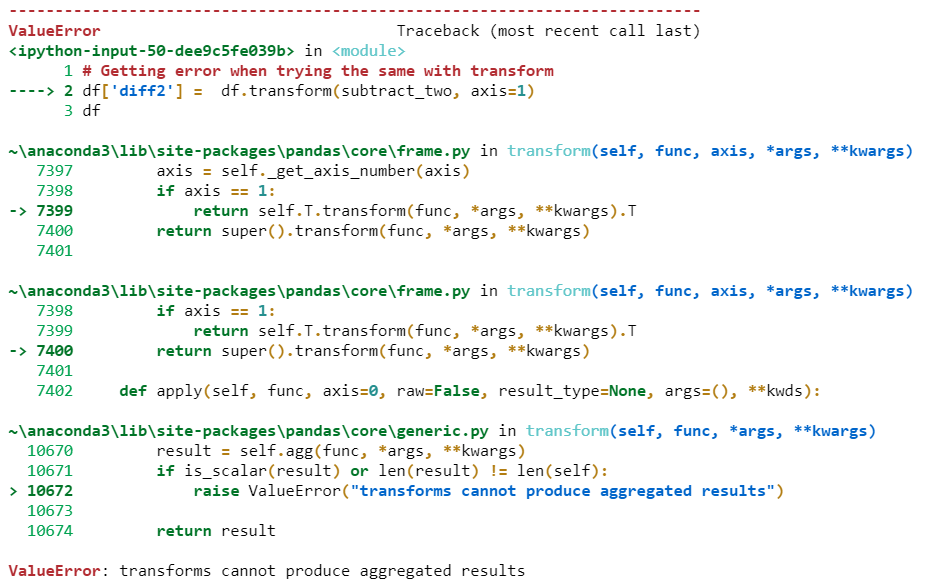

In [50]:
# apply() works fine with lambda expression
df.apply(lambda x: x['B'] - x['A'], axis=1)

0     9.0
1    18.0
2    27.0
dtype: float64

In [51]:
# Same error when using lambda expression
# Uncomment to see error

# df.transform(lambda x: x['B'] - x['A'], axis=1)

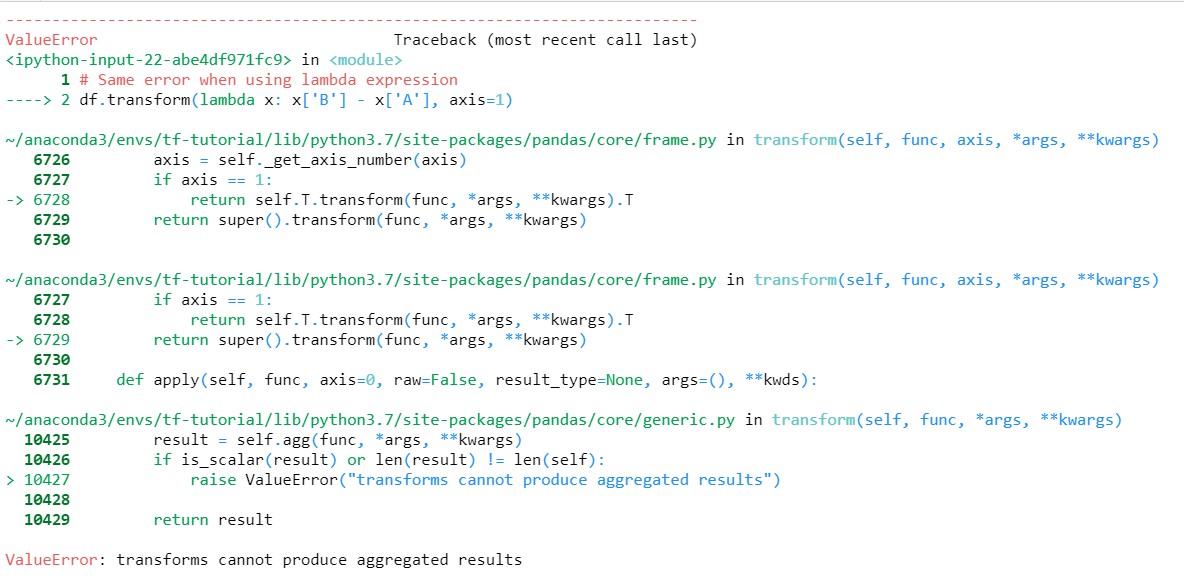

## 2 In conjunction with groupby()

In [52]:
df = pd.DataFrame({
    'key': ['a','b','c'] * 3,
    'A': np.arange(9),
    'B': [1,2,3] * 3,
})
df

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


2 differences
1. `transform()` returns a Series that has the same length as the input
2. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.

**1. `transform()` returns a Series that has the same length as the input**

In [53]:
def group_sum(x):
    return x.sum()

In [54]:
gr_data_ap = df.groupby('key')['A'].apply(group_sum)
gr_data_ap

key
a     9
b    12
c    15
Name: A, dtype: int64

In [55]:
gr_data_tr = df.groupby('key')['A'].transform(group_sum)
gr_data_tr

0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int32

**2. `apply()` works with multiple Series at a time. However, `transform()` is only allowed to work with a single Series at a time.**

In [56]:
def subtract_two(x):
    return x['B'] - x['A']

In [57]:
df.groupby('key').apply(subtract_two)

key   
a    0    1
     3   -2
     6   -5
b    1    1
     4   -2
     7   -5
c    2    1
     5   -2
     8   -5
dtype: int64

In [58]:
## Getting error

# Uncommenet to see error
# df.groupby('key').transform(subtract_two)

# Problem Solving

In [49]:
# Replacing 2nd word of col_a with 1st word of col_a

dfp = df.copy()
dfp

dfp['DupA'] = dfp['col_a']
dfp

x = dfp.col_a.str.split(',').str[0]

def func(row):
    return row['DupA'].replace(row['DupA'].split(',')[1], row['DupA'].split(',')[0])


dfp['DupA'] = dfp.apply(func, axis = 1)

dfp

d2= dfp.apply(func, axis = 1)

d2

,col_a,col_b,col_c,col_d
0,"Houston,TX",62K-70K,A,1x
1,"Dallas,TX",62K-70K,B,1y
2,"Chicago,IL",69K-76K,A,2x
3,"Phoenix,AZ",62K-72K,a,1x
4,"San Diego,CA",71K-78K,c,1y


,col_a,col_b,col_c,col_d,DupA
0,"Houston,TX",62K-70K,A,1x,"Houston,TX"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,TX"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,IL"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,AZ"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,CA"


,col_a,col_b,col_c,col_d,DupA
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego"


0        Houston,Houston
1          Dallas,Dallas
2        Chicago,Chicago
3        Phoenix,Phoenix
4    San Diego,San Diego
dtype: object

In [50]:
# Data Setup

df = dfp.copy()
df

,col_a,col_b,col_c,col_d,DupA
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego"


####  Replacing 2nd word of col_a with 1st word of col_a

In [51]:
def func(row):
    return row['col_a'].replace(row['col_a'].split(',')[1],row['col_a'].split(',')[0] )

df['NewColA1'] = df.apply(func, axis=1)
df

,col_a,col_b,col_c,col_d,DupA,NewColA1
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego"


#### Replacing 2nd word of col_a with a constant value '_IN'

In [52]:
def func(row):
    return row['col_a'].replace(row['col_a'].split(',')[1],'_IN' )

df['NewColA2'] = df.apply(func, axis=1)
df

,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN"
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN"
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN"
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN"
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN"


#### Splitting 1st word of col_a to a new column

In [53]:
def func(row):
    return row['col_a'].split(',')[0]

df['NewColA3'] = df.apply(func, axis=1)
df

,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2,NewColA3
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN",Houston
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN",Dallas
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN",Chicago
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN",Phoenix
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN",San Diego


#### Replacing 2nd word of col_a with a constant value '_IN' but NOT using REPLACE - 
- **_instead use SPLIT to extract 1st word and CONCAT with the constant value '_IN'_**

In [54]:
def func(row):
    return row['col_a'].split(',')[0] + '_IN'

df['NewColA4'] = df.apply(func, axis=1)
df

,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2,NewColA3,NewColA4
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN",Houston,Houston_IN
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN",Dallas,Dallas_IN
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN",Chicago,Chicago_IN
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN",Phoenix,Phoenix_IN
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN",San Diego,San Diego_IN


In [55]:
# Tried doing the same thing, but not with '+' operator and passing each row to .apply() by axis=1

def func(row):
    print(type(row))
    return "-".join([row['col_a'].split(',')[0],'IN'])

df['NewColA6'] = df.apply(func, axis=1)
df


# It can be clearly seen that each row is passed to the ufunc as a series and is accessible as String ( str )
# That is why, cat() is not working and have to use .join.

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2,NewColA3,NewColA4,NewColA6
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN",Houston,Houston_IN,Houston-IN
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN",Dallas,Dallas_IN,Dallas-IN
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN",Chicago,Chicago_IN,Chicago-IN
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN",Phoenix,Phoenix_IN,Phoenix-IN
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN",San Diego,San Diego_IN,San Diego-IN


In [56]:
def func(row):
    return "-".join([row['col_a'].split(',')[0],row['col_d']])

df['NewColA7'] = df.apply(func, axis=1)
df


# It can be clearly seen that each row is passed to the ufunc as a series and is accessible as String ( str )
# That is why, cat() is not working and have to use .join.

,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2,NewColA3,NewColA4,NewColA6,NewColA7
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN",Houston,Houston_IN,Houston-IN,Houston- 1x
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN",Dallas,Dallas_IN,Dallas-IN,Dallas- 1y
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN",Chicago,Chicago_IN,Chicago-IN,Chicago-2x
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN",Phoenix,Phoenix_IN,Phoenix-IN,Phoenix-1x
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN",San Diego,San Diego_IN,San Diego-IN,San Diego-1y


In [57]:
# Tried doing the same thing, but not with '+' operator and passing each column to .apply() by axis=0

def func(col):
    print(type(col))
    return "-".join([col.split(',')[0], 'IN'])

df['NewColA8'] = df['col_a'].apply(func)
df


# It can be clearly seen that for each row, one column is passed to the ufunc as one cell (str) and is accessible as String ( str )
# That is why, cat() is not working and have to use .join.

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


,col_a,col_b,col_c,col_d,DupA,NewColA1,NewColA2,NewColA3,NewColA4,NewColA6,NewColA7,NewColA8
0,"Houston,TX",62K-70K,A,1x,"Houston,Houston","Houston,Houston","Houston,_IN",Houston,Houston_IN,Houston-IN,Houston- 1x,Houston-IN
1,"Dallas,TX",62K-70K,B,1y,"Dallas,Dallas","Dallas,Dallas","Dallas,_IN",Dallas,Dallas_IN,Dallas-IN,Dallas- 1y,Dallas-IN
2,"Chicago,IL",69K-76K,A,2x,"Chicago,Chicago","Chicago,Chicago","Chicago,_IN",Chicago,Chicago_IN,Chicago-IN,Chicago-2x,Chicago-IN
3,"Phoenix,AZ",62K-72K,a,1x,"Phoenix,Phoenix","Phoenix,Phoenix","Phoenix,_IN",Phoenix,Phoenix_IN,Phoenix-IN,Phoenix-1x,Phoenix-IN
4,"San Diego,CA",71K-78K,c,1y,"San Diego,San Diego","San Diego,San Diego","San Diego,_IN",San Diego,San Diego_IN,San Diego-IN,San Diego-1y,San Diego-IN
